<a href="https://colab.research.google.com/github/AlumiK/tensorflow-notebooks/blob/main/TensorFlow2/03_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression

In [9]:
import os
import requests
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [10]:
!wget 'https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv'

data = pd.read_csv('moore.csv').values
X = data[:, 0].reshape(-1, 1)
y = data[:, 1]

X = X - X.mean()
y = np.log(y)

--2020-10-08 11:10:21--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv’

moore.csv           100%[===================>]   2.25K  --.-KB/s    in 0s      

2020-10-08 11:10:21 (46.0 MB/s) - ‘moore.csv’ saved [2302/2302]



Epoch 1/200
6/6 [==============================] - 0s 1ms/step - loss: 336.3481
Epoch 2/200
6/6 [==============================] - 0s 2ms/step - loss: 341.8580
Epoch 3/200
6/6 [==============================] - 0s 1ms/step - loss: 312.6722
Epoch 4/200
6/6 [==============================] - 0s 2ms/step - loss: 216.3136
Epoch 5/200
6/6 [==============================] - 0s 2ms/step - loss: 280.1195
Epoch 6/200
6/6 [==============================] - 0s 1ms/step - loss: 165.2080
Epoch 7/200
6/6 [==============================] - 0s 1ms/step - loss: 129.4012
Epoch 8/200
6/6 [==============================] - 0s 2ms/step - loss: 109.0946
Epoch 9/200
6/6 [==============================] - 0s 2ms/step - loss: 72.0130
Epoch 10/200
6/6 [==============================] - 0s 1ms/step - loss: 45.9236
Epoch 11/200
6/6 [==============================] - 0s 1ms/step - loss: 53.0115
Epoch 12/200
6/6 [==============================] - 0s 1ms/step - loss: 21.7039
Epoch 13/200
6/6 [=======================

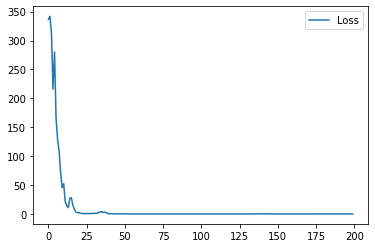

In [11]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(1),
])

model.compile(optimizer=tf.keras.optimizers.SGD(0.001, 0.9), loss='mse')
scheduler = tf.keras.callbacks.LearningRateScheduler(lambda x: 0.001 if x < 50 else 0.0001)

r = model.fit(X, y, epochs=200, callbacks=[scheduler])

plt.plot(r.history.get('loss'), label='Loss')
plt.legend()
plt.show()

Time to double: 1.9968072540569393


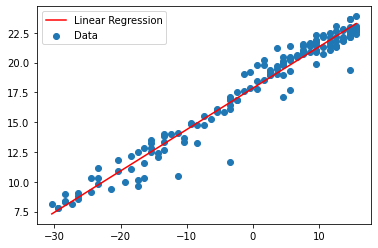

In [12]:
a = model.layers[0].get_weights()[0][0, 0]
print(f'Time to double: {np.log(2) / a}')

X_hat = np.linspace(X.min(), X.max(), 100)
y_hat = model.predict(X_hat.reshape(-1, 1))
plt.scatter(X.flatten(), y, label='Data')
plt.plot(X_hat, y_hat, color='red', label='Linear Regression')
plt.legend()
plt.show()